In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


In [2]:
df = pd.read_csv("C:\Users\wendy\UW CS Graduate\CS581_Machine Learning\Assignments\HW2\SouthGermanCredit\SouthGermanCredit.asc", sep=" ")

In [3]:
print("The shape of the DataFrame is: {}".format(df.shape))

The shape of the DataFrame is: (1000, 21)


In [4]:
df.head(10)

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1
5,1,10,4,0,2241,1,2,1,3,1,...,1,48,3,1,2,2,1,1,1,1
6,1,8,4,0,3398,1,4,1,3,1,...,1,39,3,2,2,2,2,1,1,1
7,1,6,4,0,1361,1,2,2,3,1,...,1,40,3,2,1,2,1,1,1,1
8,4,18,4,3,1098,1,1,4,2,1,...,3,65,3,2,2,1,2,1,2,1
9,2,24,2,3,3758,3,1,1,2,1,...,4,23,3,1,1,1,2,1,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   laufkont  1000 non-null   int64
 1   laufzeit  1000 non-null   int64
 2   moral     1000 non-null   int64
 3   verw      1000 non-null   int64
 4   hoehe     1000 non-null   int64
 5   sparkont  1000 non-null   int64
 6   beszeit   1000 non-null   int64
 7   rate      1000 non-null   int64
 8   famges    1000 non-null   int64
 9   buerge    1000 non-null   int64
 10  wohnzeit  1000 non-null   int64
 11  verm      1000 non-null   int64
 12  alter     1000 non-null   int64
 13  weitkred  1000 non-null   int64
 14  wohn      1000 non-null   int64
 15  bishkred  1000 non-null   int64
 16  beruf     1000 non-null   int64
 17  pers      1000 non-null   int64
 18  telef     1000 non-null   int64
 19  gastarb   1000 non-null   int64
 20  kredit    1000 non-null   int64
dtypes: int64(21)
memory usage: 164.2 KB


In [6]:
df.duplicated().sum()

0

We view the 300 data with bad credit scores:

In [7]:
df[df['kredit'] == 0]

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
22,2,36,2,5,2384,1,2,4,3,1,...,4,33,3,1,1,2,2,1,2,0
45,1,18,2,0,1216,1,2,4,2,1,...,3,23,3,1,1,3,2,2,2,0
47,4,18,4,6,1864,2,3,4,2,1,...,1,30,3,2,2,3,2,1,2,0
97,2,36,3,9,4455,1,3,2,1,1,...,1,30,2,2,2,4,2,2,2,0
110,1,15,2,0,3959,1,3,3,2,1,...,2,29,3,2,1,3,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,...,1,21,3,1,1,2,1,1,2,0
996,1,24,2,0,2303,1,5,4,3,2,...,1,45,3,2,1,3,2,1,2,0
997,4,21,4,0,12680,5,5,4,3,1,...,4,30,3,3,1,4,2,2,2,0
998,2,12,2,3,6468,5,1,2,3,1,...,4,52,3,2,1,4,2,2,2,0


In [8]:
input_n = df.drop(['kredit'], axis='columns')

In [9]:
print(input_n)

     laufkont  laufzeit  moral  verw  hoehe  sparkont  beszeit  rate  famges  \
0           1        18      4     2   1049         1        2     4       2   
1           1         9      4     0   2799         1        3     2       3   
2           2        12      2     9    841         2        4     2       2   
3           1        12      4     0   2122         1        3     3       3   
4           1        12      4     0   2171         1        3     4       3   
..        ...       ...    ...   ...    ...       ...      ...   ...     ...   
995         1        24      2     3   1987         1        3     2       3   
996         1        24      2     0   2303         1        5     4       3   
997         4        21      4     0  12680         5        5     4       3   
998         2        12      2     3   6468         5        1     2       3   
999         1        30      2     2   6350         5        5     4       3   

     buerge  wohnzeit  verm  alter  wei

In [10]:
target_n = df['kredit']

In [11]:
print(target_n)

0      1
1      1
2      1
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: kredit, Length: 1000, dtype: int64


## a) Build the model with Logistic Regression Method

In [12]:
kfold = StratifiedKFold(n_splits=10)
m_lr = LogisticRegression() 

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1

recalls =[]
precisions =[]
f1scores =[]

C:\Users\wendy\Download\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\wendy\Download\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

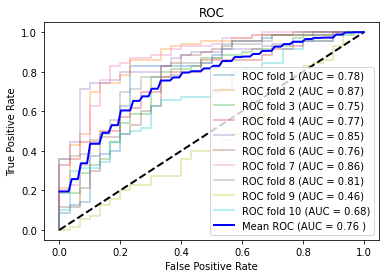

In [13]:
x = input_n
y = target_n
for train,test in kfold.split(x,y):
    model = m_lr.fit(x.iloc[train],y.iloc[train])
    pred_prob = model.predict_proba(x.iloc[test])
    pred = model.predict(x.iloc[test])

    #prediction = m_rfc.fit(x[train],y[train]).predict_proba(x[test])
    fpr, tpr, t = metrics.roc_curve(y.iloc[test], pred_prob[:, 1])
    recalls.append(metrics.recall_score(y.iloc[test], pred))
    precisions.append(metrics.precision_score(y.iloc[test], pred))
    f1scores.append(metrics.f1_score(y.iloc[test], pred))
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    roc_auc = metrics.auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = metrics.auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [14]:
print(recalls)
print(np.mean(recalls))

[0.9571428571428572, 0.9428571428571428, 0.9142857142857143, 0.8857142857142857, 0.9142857142857143, 0.8857142857142857, 0.9285714285714286, 0.8571428571428571, 0.6857142857142857, 0.8428571428571429]
0.8814285714285713


In [15]:
print(precisions)
print(np.mean(precisions))

[0.788235294117647, 0.825, 0.7529411764705882, 0.7469879518072289, 0.7619047619047619, 0.8157894736842105, 0.8333333333333334, 0.8, 0.6956521739130435, 0.7468354430379747]
0.7766679608268788


In [16]:
print(f1scores)
print(np.mean(f1scores))

[0.864516129032258, 0.88, 0.8258064516129033, 0.8104575163398692, 0.8311688311688312, 0.8493150684931505, 0.8783783783783784, 0.8275862068965518, 0.6906474820143885, 0.7919463087248322]
0.8249822372661164


In [17]:
print(aucs)
print(np.mean(aucs))

[0.7790476190476191, 0.8695238095238096, 0.7509523809523809, 0.7661904761904762, 0.8533333333333334, 0.7647619047619048, 0.8623809523809524, 0.8071428571428572, 0.4580952380952381, 0.6828571428571428]
0.7594285714285715


## Using Decision Tree

Let us try a Random Forest Classifier and compare its performance with Logistic Regression Classifier:

In [18]:
m_rfc = RandomForestClassifier(n_estimators=50) 

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1

recalls =[]
precisions =[]
f1scores =[]

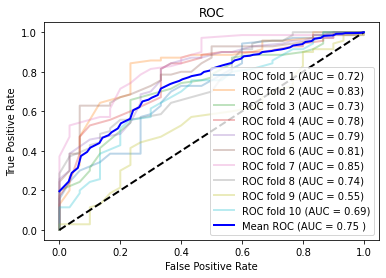

In [19]:
x = input_n
y = target_n
for train,test in kfold.split(x,y):
    model = m_rfc.fit(x.iloc[train],y.iloc[train])
    pred_prob = model.predict_proba(x.iloc[test])
    pred = model.predict(x.iloc[test])

    #prediction = m_rfc.fit(x[train],y[train]).predict_proba(x[test])
    fpr, tpr, t = metrics.roc_curve(y.iloc[test], pred_prob[:, 1])
    recalls.append(metrics.recall_score(y.iloc[test], pred))
    precisions.append(metrics.precision_score(y.iloc[test], pred))
    f1scores.append(metrics.f1_score(y.iloc[test], pred))
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    roc_auc = metrics.auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = metrics.auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [20]:
print(recalls)
print(np.mean(recalls))

[0.9428571428571428, 0.8857142857142857, 0.8857142857142857, 0.9, 0.9285714285714286, 0.8714285714285714, 0.9142857142857143, 0.8571428571428571, 0.7142857142857143, 0.8]
0.8699999999999999


In [21]:
print(precisions)
print(np.mean(precisions))

[0.7857142857142857, 0.7848101265822784, 0.7469879518072289, 0.7875, 0.7738095238095238, 0.8026315789473685, 0.8205128205128205, 0.7792207792207793, 0.6944444444444444, 0.7671232876712328]
0.7742754798709962


In [22]:
print(f1scores)
print(np.mean(f1scores))

[0.8571428571428571, 0.8322147651006712, 0.8104575163398692, 0.84, 0.8441558441558441, 0.8356164383561644, 0.8648648648648648, 0.8163265306122449, 0.7042253521126761, 0.7832167832167832]
0.8188220951901976


In [23]:
print(aucs)
print(np.mean(aucs))

[0.7166666666666666, 0.8264285714285714, 0.7300000000000001, 0.7828571428571429, 0.7854761904761903, 0.8121428571428572, 0.8547619047619047, 0.7435714285714287, 0.5504761904761905, 0.6938095238095239]
0.7496190476190475


The two models shows very similar performance, so we will proceed to use RandomForest Classifier.

## b) Reducing the number of instances from the bad scores to:

### (i) 150 instances 

In [24]:
drop_b150 = (df[df['kredit'] == 0][150:]).index
print(drop_b150)

Int64Index([850, 851, 852, 853, 854, 855, 856, 857, 858, 859,
            ...
            990, 991, 992, 993, 994, 995, 996, 997, 998, 999],
           dtype='int64', length=150)


In [25]:
input_b150 = df.drop(index=drop_b150, axis=0)

In [26]:
print(input_b150)

     laufkont  laufzeit  moral  verw  hoehe  sparkont  beszeit  rate  famges  \
0           1        18      4     2   1049         1        2     4       2   
1           1         9      4     0   2799         1        3     2       3   
2           2        12      2     9    841         2        4     2       2   
3           1        12      4     0   2122         1        3     3       3   
4           1        12      4     0   2171         1        3     4       3   
..        ...       ...    ...   ...    ...       ...      ...   ...     ...   
845         2        27      4     3   2520         3        3     4       3   
846         2        30      3     3   1919         2        2     4       3   
847         2        60      1    10  14782         2        5     3       2   
848         2        36      2     3   2671         2        3     4       2   
849         2        36      2     6  12612         2        3     1       3   

     buerge  ...  verm  alter  weitkred

In [27]:
# Double check if data with credit == 0 is only left with 150
input_b150[input_b150['kredit'] == 0]

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
22,2,36,2,5,2384,1,2,4,3,1,...,4,33,3,1,1,2,2,1,2,0
45,1,18,2,0,1216,1,2,4,2,1,...,3,23,3,1,1,3,2,2,2,0
47,4,18,4,6,1864,2,3,4,2,1,...,1,30,3,2,2,3,2,1,2,0
97,2,36,3,9,4455,1,3,2,1,1,...,1,30,2,2,2,4,2,2,2,0
110,1,15,2,0,3959,1,3,3,2,1,...,2,29,3,2,1,3,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,2,27,4,3,2520,3,3,4,3,1,...,2,23,3,2,2,2,2,1,2,0
846,2,30,3,3,1919,2,2,4,3,1,...,4,30,2,2,2,4,2,1,2,0
847,2,60,1,10,14782,2,5,3,2,1,...,4,60,1,3,2,4,2,2,2,0
848,2,36,2,3,2671,2,3,4,2,2,...,4,50,3,3,1,3,2,1,2,0


In [28]:
target_b150 = input_b150['kredit']

In [29]:
target_b150

0      1
1      1
2      1
3      1
4      1
      ..
845    0
846    0
847    0
848    0
849    0
Name: kredit, Length: 850, dtype: int64

In [30]:
input_b150 = input_b150.drop(['kredit'], axis='columns')
input_b150

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,wohnzeit,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,2,1,2
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,1,1,2
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,2,1,2
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,2,27,4,3,2520,3,3,4,3,1,2,2,23,3,2,2,2,2,1,2
846,2,30,3,3,1919,2,2,4,3,1,3,4,30,2,2,2,4,2,1,2
847,2,60,1,10,14782,2,5,3,2,1,4,4,60,1,3,2,4,2,2,2
848,2,36,2,3,2671,2,3,4,2,2,4,4,50,3,3,1,3,2,1,2


In [31]:
m_rfc2 = RandomForestClassifier(n_estimators=50) 

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1

recalls =[]
precisions =[]
f1scores =[]

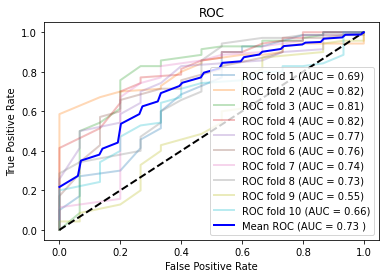

In [32]:
x = input_b150
y = target_b150
for train,test in kfold.split(x,y):
    model = m_rfc2.fit(x.iloc[train],y.iloc[train])
    pred_prob = model.predict_proba(x.iloc[test])
    pred = model.predict(x.iloc[test])

    #prediction = m_rfc.fit(x[train],y[train]).predict_proba(x[test])
    fpr, tpr, t = metrics.roc_curve(y.iloc[test], pred_prob[:, 1])
    recalls.append(metrics.recall_score(y.iloc[test], pred))
    precisions.append(metrics.precision_score(y.iloc[test], pred))
    f1scores.append(metrics.f1_score(y.iloc[test], pred))
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    roc_auc = metrics.auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = metrics.auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [33]:
print(recalls)
print(np.mean(recalls))

[1.0, 0.9857142857142858, 0.9857142857142858, 0.9714285714285714, 0.9857142857142858, 0.9857142857142858, 0.9857142857142858, 0.9571428571428572, 0.9285714285714286, 0.9285714285714286]
0.9714285714285715


In [34]:
print(precisions)
print(np.mean(precisions))

[0.8433734939759037, 0.8214285714285714, 0.8414634146341463, 0.85, 0.8414634146341463, 0.8313253012048193, 0.8313253012048193, 0.881578947368421, 0.8333333333333334, 0.8227848101265823]
0.8398076587910742


In [35]:
print(f1scores)
print(np.mean(f1scores))

[0.9150326797385622, 0.8961038961038961, 0.9078947368421053, 0.9066666666666667, 0.9078947368421053, 0.9019607843137254, 0.9019607843137254, 0.9178082191780822, 0.8783783783783784, 0.87248322147651]
0.9006184103853758


In [36]:
print(aucs)
print(np.mean(aucs))

[0.6919047619047619, 0.8152380952380952, 0.811904761904762, 0.8152380952380953, 0.770952380952381, 0.7557142857142857, 0.7380952380952381, 0.7309523809523808, 0.5452380952380953, 0.6561904761904762]
0.7331428571428571


As we can see from the scores and ROC curve of the two different models, when we reduce the data with bad credit from 300 to 150, the general performance of the model increased. However, we can not percieve this as the model's performace has improved. The performance looks better for the second model because the negative class instances has dramatically decrease to only 150, which means there are actually less data instances to be classified to negative class.

### (ii) 30 instances 

In [37]:
drop_b30 = (df[df['kredit'] == 0][30:]).index
print(drop_b30)

Int64Index([582, 583, 584, 592, 593, 599, 600, 604, 610, 618,
            ...
            990, 991, 992, 993, 994, 995, 996, 997, 998, 999],
           dtype='int64', length=270)


In [38]:
input_b30 = df.drop(index=drop_b30, axis=0)

In [39]:
print(input_b30)

     laufkont  laufzeit  moral  verw  hoehe  sparkont  beszeit  rate  famges  \
0           1        18      4     2   1049         1        2     4       2   
1           1         9      4     0   2799         1        3     2       3   
2           2        12      2     9    841         2        4     2       2   
3           1        12      4     0   2122         1        3     3       3   
4           1        12      4     0   2171         1        3     4       3   
..        ...       ...    ...   ...    ...       ...      ...   ...     ...   
746         2        24      2     1   2760         5        5     4       3   
747         4        24      4     5   5507         1        5     3       3   
748         2         9      2     6   1199         1        4     4       2   
749         3        24      2     2   2892         1        5     3       1   
750         2        36      3     0   2862         2        5     4       3   

     buerge  ...  verm  alter  weitkred

In [40]:
# Double check if data with credit == 0 is only left with 30
input_b30[input_b30['kredit'] == 0]

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
22,2,36,2,5,2384,1,2,4,3,1,...,4,33,3,1,1,2,2,1,2,0
45,1,18,2,0,1216,1,2,4,2,1,...,3,23,3,1,1,3,2,2,2,0
47,4,18,4,6,1864,2,3,4,2,1,...,1,30,3,2,2,3,2,1,2,0
97,2,36,3,9,4455,1,3,2,1,1,...,1,30,2,2,2,4,2,2,2,0
110,1,15,2,0,3959,1,3,3,2,1,...,2,29,3,2,1,3,2,2,2,0
158,2,48,1,9,6416,1,5,4,2,1,...,4,59,3,1,1,3,2,1,2,0
171,1,12,2,0,1228,1,3,4,2,1,...,1,24,3,2,1,2,2,1,2,0
234,2,12,2,0,685,1,4,2,4,1,...,3,25,1,2,1,2,2,1,2,0
304,3,9,2,3,745,1,3,3,2,1,...,1,28,3,2,1,2,2,1,2,0
353,1,12,4,0,3499,1,3,3,2,2,...,1,29,3,2,2,3,2,1,2,0


In [41]:
target_b30 = input_b30['kredit']

In [42]:
target_b30

0      1
1      1
2      1
3      1
4      1
      ..
746    1
747    1
748    1
749    1
750    1
Name: kredit, Length: 730, dtype: int64

In [43]:
input_b30 = input_b30.drop(['kredit'], axis='columns')
input_b30

In [44]:
m_rfc3 = RandomForestClassifier(n_estimators=50) 

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1

recalls =[]
precisions =[]
f1scores =[]

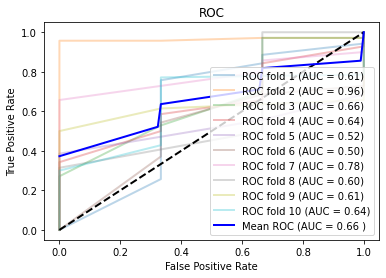

In [45]:
x = input_b30
y = target_b30
for train,test in kfold.split(x,y):
    model = m_rfc3.fit(x.iloc[train],y.iloc[train])
    pred_prob = model.predict_proba(x.iloc[test])
    pred = model.predict(x.iloc[test])

    #prediction = m_rfc.fit(x[train],y[train]).predict_proba(x[test])
    fpr, tpr, t = metrics.roc_curve(y.iloc[test], pred_prob[:, 1])
    recalls.append(metrics.recall_score(y.iloc[test], pred))
    precisions.append(metrics.precision_score(y.iloc[test], pred))
    f1scores.append(metrics.f1_score(y.iloc[test], pred))
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    roc_auc = metrics.auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = metrics.auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [46]:
print(recalls)
print(np.mean(recalls))

[1.0, 0.9857142857142858, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0.9985714285714286


In [47]:
print(precisions)
print(np.mean(precisions))

[0.958904109589041, 0.9583333333333334, 0.958904109589041, 0.958904109589041, 0.958904109589041, 0.958904109589041, 0.958904109589041, 0.958904109589041, 0.958904109589041, 0.958904109589041]
0.9588470319634702


In [48]:
print(f1scores)
print(np.mean(f1scores))

[0.9790209790209791, 0.971830985915493, 0.9790209790209791, 0.9790209790209791, 0.9790209790209791, 0.9790209790209791, 0.9790209790209791, 0.9790209790209791, 0.9790209790209791, 0.9790209790209791]
0.9783019797104304


In [49]:
print(aucs)
print(np.mean(aucs))

[0.6142857142857142, 0.9642857142857142, 0.661904761904762, 0.6428571428571428, 0.5214285714285715, 0.5023809523809524, 0.7785714285714287, 0.6047619047619048, 0.6095238095238096, 0.6404761904761905]
0.6540476190476191


As we can see from the scores and ROC curve of the two different models, when we reduce the data with bad credit from 300 to 30, the general performance of the model increased. However, we can not percieve this as the model's performace has improved. The performance looks better for the second model because the negative class instances has dramatically decrease to only 30, which means there are actually less data instances to be classified to negative class. The ROC curve also shows this situation with more diverse curve for each fold and a lot fewer false positive rate (there are in general a lot fewer negative instances).

### (iii) 10 instances

In [50]:
drop_b10 = (df[df['kredit'] == 0][10:]).index
print(drop_b10)

Int64Index([376, 386, 427, 431, 450, 463, 517, 518, 519, 520,
            ...
            990, 991, 992, 993, 994, 995, 996, 997, 998, 999],
           dtype='int64', length=290)


In [51]:
input_b10 = df.drop(index=drop_b10, axis=0)

In [52]:
print(input_b10)

     laufkont  laufzeit  moral  verw  hoehe  sparkont  beszeit  rate  famges  \
0           1        18      4     2   1049         1        2     4       2   
1           1         9      4     0   2799         1        3     2       3   
2           2        12      2     9    841         2        4     2       2   
3           1        12      4     0   2122         1        3     3       3   
4           1        12      4     0   2171         1        3     4       3   
..        ...       ...    ...   ...    ...       ...      ...   ...     ...   
746         2        24      2     1   2760         5        5     4       3   
747         4        24      4     5   5507         1        5     3       3   
748         2         9      2     6   1199         1        4     4       2   
749         3        24      2     2   2892         1        5     3       1   
750         2        36      3     0   2862         2        5     4       3   

     buerge  ...  verm  alter  weitkred

In [53]:
# Double check if data with credit == 0 is only left with 10
input_b10[input_b10['kredit'] == 0]

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
22,2,36,2,5,2384,1,2,4,3,1,...,4,33,3,1,1,2,2,1,2,0
45,1,18,2,0,1216,1,2,4,2,1,...,3,23,3,1,1,3,2,2,2,0
47,4,18,4,6,1864,2,3,4,2,1,...,1,30,3,2,2,3,2,1,2,0
97,2,36,3,9,4455,1,3,2,1,1,...,1,30,2,2,2,4,2,2,2,0
110,1,15,2,0,3959,1,3,3,2,1,...,2,29,3,2,1,3,2,2,2,0
158,2,48,1,9,6416,1,5,4,2,1,...,4,59,3,1,1,3,2,1,2,0
171,1,12,2,0,1228,1,3,4,2,1,...,1,24,3,2,1,2,2,1,2,0
234,2,12,2,0,685,1,4,2,4,1,...,3,25,1,2,1,2,2,1,2,0
304,3,9,2,3,745,1,3,3,2,1,...,1,28,3,2,1,2,2,1,2,0
353,1,12,4,0,3499,1,3,3,2,2,...,1,29,3,2,2,3,2,1,2,0


In [54]:
target_b10 = input_b10['kredit']

In [55]:
target_b10

0      1
1      1
2      1
3      1
4      1
      ..
746    1
747    1
748    1
749    1
750    1
Name: kredit, Length: 710, dtype: int64

In [56]:
input_b10 = input_b10.drop(['kredit'], axis='columns')

In [57]:
m_rfc4 = RandomForestClassifier(n_estimators=50) 

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1

recalls =[]
precisions =[]
f1scores =[]

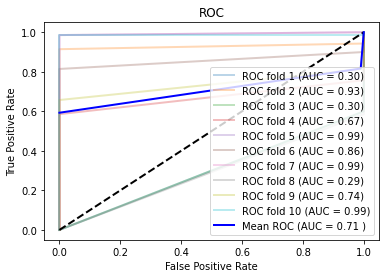

In [58]:
x = input_b10
y = target_b10
for train,test in kfold.split(x,y):
    model = m_rfc4.fit(x.iloc[train],y.iloc[train])
    pred_prob = model.predict_proba(x.iloc[test])
    pred = model.predict(x.iloc[test])

    #prediction = m_rfc.fit(x[train],y[train]).predict_proba(x[test])
    fpr, tpr, t = metrics.roc_curve(y.iloc[test], pred_prob[:, 1])
    recalls.append(metrics.recall_score(y.iloc[test], pred))
    precisions.append(metrics.precision_score(y.iloc[test], pred))
    f1scores.append(metrics.f1_score(y.iloc[test], pred))
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    roc_auc = metrics.auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = metrics.auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [59]:
print(recalls)
print(np.mean(recalls))

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
1.0


In [60]:
print(precisions)
print(np.mean(precisions))

[0.9859154929577465, 0.9859154929577465, 0.9859154929577465, 0.9859154929577465, 0.9859154929577465, 0.9859154929577465, 0.9859154929577465, 0.9859154929577465, 0.9859154929577465, 0.9859154929577465]
0.9859154929577464


In [61]:
print(f1scores)
print(np.mean(f1scores))

[0.9929078014184397, 0.9929078014184397, 0.9929078014184397, 0.9929078014184397, 0.9929078014184397, 0.9929078014184397, 0.9929078014184397, 0.9929078014184397, 0.9929078014184397, 0.9929078014184397]
0.9929078014184396


In [62]:
print(aucs)
print(np.mean(aucs))

[0.3, 0.9285714285714286, 0.3, 0.6714285714285715, 0.9928571428571429, 0.8571428571428572, 0.9928571428571429, 0.29285714285714287, 0.7357142857142858, 0.9857142857142858]
0.7057142857142857


As we can see from the scores and ROC curve of the last model, when we reduce the data with bad credit from 300 to 10, the accuracy of the model suddenly went up to 100%. 
This is becuase the data set belonging to the negative class (bad credit) is even smaller for training the model. Almost all the data we have belong to positive class, therefore the predition for test data can look really good. However, this model is not likely to perform well when predicting unseen real world data.

As we can see from the scores and ROC curve of the two different models, when we reduce the data with bad credit from 300 to 10, the general performance of the model increased. The recall score even reached 1.0 However, we can not percieve this as the model's performace has improved. The performance looks better for the second model because the negative class instances has dramatically decrease to only 10, which means there are actually rarely any data instances to be classified to negative class. The ROC curve also shows this situation with more diverse curve for each fold and a lot fewer false positive rate (there are in general a lot fewer negative instances).